In [1]:
%load_ext autoreload
import json
import sys
import pathlib
from matplotlib import pylab as plt
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns
import random

In [2]:
question: str = "Erkläre den Prozess der Photosynthese und beschreibe, welche Rolle er für das Ökosystem spielt.\n"

answers: list[str] = [
    "Photosynthese bedeutet, dass Pflanzen den ganzen Tag tanzen und Sonnenlicht essen, um Magie zu erzeugen – das hat nichts mit unserem Ökosystem zu tun.",
    "Photosynthese ist, wenn Pflanzen Sonnenlicht nutzen, um Energie zu produzieren.",
    "Bei der Photosynthese sollen Pflanzen irgendwie Licht aufnehmen und in Energie umwandeln. Es ist unklar, wie dieser Prozess funktioniert oder warum er wichtig ist.",
    "Photosynthese ist der Vorgang, bei dem Pflanzen Lichtenergie nutzen, um Wasser und Kohlendioxid in Zucker und Sauerstoff umzuwandeln. Dabei spielt der entstehende Sauerstoff eine Rolle, doch es wird nicht weiter auf die Bedeutung für das gesamte Ökosystem eingegangen.",
    "Photosynthese bezeichnet den biochemischen Prozess, in dem grüne Pflanzen Lichtenergie in chemische Energie umwandeln, indem sie Kohlendioxid und Wasser in Glukose und Sauerstoff umwandeln. Dieser Prozess liefert den Pflanzen selbst Energie und stellt so die Basis der Nahrungskette dar, auch wenn weitergehende Zusammenhänge nicht erläutert werden.",
    "Photosynthese ist der Prozess, bei dem grüne Pflanzen, Algen und manche Bakterien Sonnenlicht absorbieren, um Kohlendioxid und Wasser in Glukose (einen Zucker) und Sauerstoff umzuwandeln. Dieser Vorgang liefert nicht nur die Energie für die Pflanze, sondern bildet auch die primäre Energiequelle in Ökosystemen, indem er die Nahrungskette antreibt und den atmosphärischen Sauerstoff erneuert.",
    "Photosynthese ist ein fundamentaler biochemischer Prozess, bei dem grüne Pflanzen, Algen und bestimmte Bakterien mithilfe von Chlorophyll Sonnenlicht nutzen, um Kohlendioxid und Wasser in Glukose und Sauerstoff umzuwandeln. Diese Umwandlung stellt die Grundlage für die Energieversorgung in fast allen Ökosystemen dar, da sie den Ausgangspunkt der Nahrungsketten bildet und maßgeblich zur Sauerstoffversorgung der Atmosphäre beiträgt.",
    "Bei der Photosynthese absorbieren Pflanzen, Algen und Cyanobakterien mit Hilfe von Chlorophyll Sonnenlicht, das in chemische Energie umgewandelt wird. In einem zweistufigen Prozess – den lichtabhängigen Reaktionen, bei denen Wasser gespalten und Sauerstoff freigesetzt wird, sowie dem lichtunabhängigen Calvin-Zyklus, in dem Kohlendioxid zu Glukose verarbeitet wird – erzeugen diese Organismen die notwendigen organischen Verbindungen. Dadurch liefern sie nicht nur den eigenen Energiebedarf, sondern bilden auch die Grundlage der Nahrungsketten und tragen zur Aufrechterhaltung eines sauerstoffreichen und kohlendioxidarmen Klimas bei.","Photosynthese ist ein essenzieller biochemischer Prozess, der in den Chloroplasten grüner Pflanzen, Algen und bestimmter Bakterien stattfindet. Mithilfe von Chlorophyll wird in den lichtabhängigen Reaktionen Lichtenergie genutzt, um Wasser (H₂O) zu spalten, wobei Sauerstoff (O₂) freigesetzt wird. Anschließend werden im Calvin-Zyklus Kohlendioxid (CO₂) und die erzeugten Zwischenprodukte zu Glukose umgewandelt. Dieser Prozess liefert den Organismen nicht nur den notwendigen Brennstoff für ihre Lebensprozesse, sondern bildet auch die Basis der Nahrungsketten in nahezu allen terrestrischen und aquatischen Ökosystemen. Gleichzeitig spielt er eine zentrale Rolle bei der Regulierung der atmosphärischen Zusammensetzung, indem er CO₂ bindet und O₂ freisetzt.",
    """Photosynthese ist ein fundamentaler biochemischer Prozess, der in den Chloroplasten von grünen Pflanzen, Algen und bestimmten Cyanobakterien abläuft. Dabei wird in zwei wesentlichen Phasen vorgegangen:

    Lichtabhängige Reaktionen:
    Hier absorbiert das Chlorophyll in den Chloroplasten Sonnenlicht, was zur Spaltung von Wasser (H₂O) führt. Dabei entstehen Elektronen, Protonen und molekularer Sauerstoff (O₂), der in die Atmosphäre abgegeben wird.
    Lichtunabhängiger Calvin-Zyklus:
    In dieser Phase wird das freigesetzte Kohlendioxid (CO₂) mithilfe der in der ersten Phase gewonnenen Energie fixiert und schrittweise in organische Verbindungen wie Glukose umgewandelt. Diese Glukose dient als primäre Energiequelle und als Ausgangsstoff für den Aufbau weiterer Biomoleküle in der Pflanze.

Die Photosynthese ist nicht nur entscheidend für das Überleben der Pflanzen selbst, sondern bildet auch die Grundlage der gesamten Nahrungsketten. Indem sie atmosphärisches Kohlendioxid bindet und Sauerstoff produziert, spielt sie eine zentrale Rolle in der globalen Klimaregulierung und im Erhalt eines lebensfreundlichen Planeten. Dieser Prozess stellt somit einen der wichtigsten biogeochemischen Kreisläufe dar und sichert die Energie- und Stoffversorgung in nahezu allen Ökosystemen."""
]

data: dict[str, str] = {f"{i}aaa": f"{question}\n{a}" for i, a in enumerate(answers)}


print(data.keys())
random_order = list(data.keys())
random.shuffle(random_order)
print(random_order)

dict_keys(['0aaa', '1aaa', '2aaa', '3aaa', '4aaa', '5aaa', '6aaa', '7aaa', '8aaa', '9aaa'])
['4aaa', '6aaa', '0aaa', '3aaa', '8aaa', '5aaa', '2aaa', '7aaa', '9aaa', '1aaa']


In [4]:
%autoreload 2
from llm import send_prompt, sort_function

def sort_f1(d1, d2):
    systemprompt = """You are provided with two Notebooks (Notebook A and Notebook B), each containing a question and an answer. Determine which notebook contains the better solutions and output ONLY "Notebook A" or "Notebook B"."""
    return sort_function(d1, d2, data, systemprompt)

sort_f1('3aaa', '1aaa')

3aaa > 1aaa


False

In [5]:
%autoreload 2
from sort import quicksort, heapsort, bubble_sort

quicksort_order = quicksort(random_order, sort_f1)
print("Quicksort:", quicksort_order)
heapsort_order = heapsort(random_order, sort_f1)
print("Heapsort:", heapsort_order)
bubble_order = bubble_sort(random_order, sort_f1)
print("Bubblesort:", bubble_order)

6aaa > 4aaa
0aaa < 6aaa
0aaa < 4aaa
3aaa < 6aaa
3aaa < 4aaa
3aaa > 0aaa
8aaa > 6aaa
5aaa < 8aaa
5aaa > 6aaa
2aaa < 8aaa
2aaa < 5aaa
2aaa < 6aaa
2aaa < 4aaa
2aaa < 3aaa
2aaa > 0aaa
7aaa > 8aaa
9aaa > 7aaa
1aaa < 9aaa
1aaa < 7aaa
1aaa < 8aaa
1aaa < 5aaa
1aaa < 6aaa
1aaa < 4aaa
1aaa < 3aaa
1aaa > 2aaa
Quicksort: ['0aaa', '2aaa', '1aaa', '3aaa', '4aaa', '6aaa', '5aaa', '8aaa', '7aaa', '9aaa']
1aaa < 8aaa
7aaa > 9aaa
7aaa > 3aaa
5aaa > 2aaa
5aaa > 0aaa
7aaa > 8aaa
3aaa < 9aaa
9aaa > 6aaa
7aaa > 5aaa
9aaa > 8aaa
3aaa < 6aaa
6aaa > 4aaa
9aaa > 5aaa
6aaa < 8aaa
8aaa > 1aaa
8aaa > 5aaa
6aaa > 1aaa
3aaa < 4aaa
6aaa > 4aaa
6aaa > 5aaa
4aaa > 1aaa
4aaa > 3aaa
4aaa < 5aaa
0aaa < 2aaa
5aaa > 2aaa
4aaa > 2aaa
3aaa > 1aaa
3aaa > 0aaa
3aaa > 2aaa
0aaa < 1aaa
3aaa > 1aaa
1aaa > 2aaa
1aaa > 0aaa
0aaa < 2aaa
Heapsort: ['0aaa', '2aaa', '1aaa', '3aaa', '4aaa', '5aaa', '6aaa', '8aaa', '9aaa', '7aaa']
6aaa > 4aaa
0aaa < 6aaa
3aaa < 6aaa
8aaa > 6aaa
5aaa < 8aaa
2aaa < 8aaa
7aaa > 8aaa
9aaa > 7aaa
1aaa < 9aaa
0

In [6]:
df = pd.DataFrame(data.keys(), columns=['id'])
df['true_rank'] = df['id'].map(lambda x: list(data.keys()).index(x))
df['inital_order'] = df['id'].map(lambda x: random_order.index(x))
df['quicksort_rank'] = df['id'].map(lambda x: quicksort_order.index(x))
df['heapsort_rank'] = df['id'].map(lambda x: heapsort_order.index(x))
df['bubblesort_rank'] = df['id'].map(lambda x: bubble_order.index(x))
df.set_index('id', inplace=True)
df

,true_rank,inital_order,quicksort_rank,heapsort_rank,bubblesort_rank
id,,,,,
0aaa,0,2,0,0,0
1aaa,1,9,2,2,2
2aaa,2,6,1,1,1
3aaa,3,3,3,3,3
4aaa,4,0,4,4,4
5aaa,5,5,6,5,6
6aaa,6,1,5,6,5
7aaa,7,7,8,9,8
8aaa,8,4,7,7,7


<Axes: >

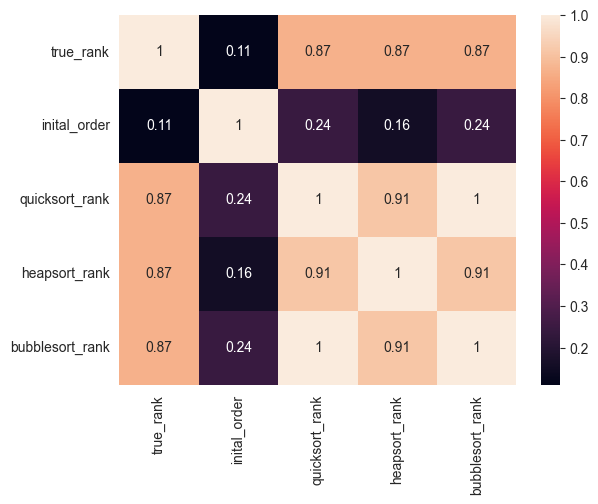

In [7]:
# sns heatmap
sns.heatmap(df.corr(method='kendall'), annot=True)

In [11]:
heapsort_order

['7aaa',
 '1aaa',
 '2aaa',
 '9aaa',
 '5aaa',
 '0aaa',
 '3aaa',
 '8aaa',
 '4aaa',
 '6aaa']